<a href="https://colab.research.google.com/github/Saptak3315/Dip_Lab_Task_2019331515/blob/main/Copy_of_DIP_lab_exam_sec%5B19_20%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task of DIP Lab Final 2024(SEC 2019-20):
1.  Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2.  Convert the RGB image(`DIP_Lab_task_02.jpg`) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3.  Apply Image(`DIP_Lab_task_03.png`) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4.  Implement an appropriate technique to reduce the brightness of the provided image (`DIP_Lab_task_04.jpg`) effectively. [20]
5.  Solve the segmentation problem for the given image: `'DIP_Lab_task_05.jpg'` [30]



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lab Resources

https://drive.google.com/drive/folders/1DnF8_teHpzrHNvSspl-W5ooxNyxvUU2t?usp=sharing

Some Instructions to be strictly followed:
- You have to do the task individually but can discuss about the solution approach and possible technique to be applied to get the task done.
- **Do not share any of your code** with your fellow classmates that may have a huge penalty on both of your score.
- Create a git repo and submit the task there. Try to commit after completing each task individually. The git repo should be **private** until the submission.
- Make a video presentation of 4 minutes(max) explaining:
  1. Briefly explain the logical part of each task and what approaches you have taken to solve the problem
  2. Show the graphics output of the tasks
  3. Give a tour of your code
  4. Is there any other way to achieve similar/better results
  5. Mention the sources you got assistance from.[e.g. chatGPT]

### Deadline: 27/12/24 <11:59 pm>
*I won't accept any late submission. Your git repo should be public after 28/12/24 12:00 am*

Submission Link: https://docs.google.com/forms/d/e/1FAIpQLScK7S7uc_zNd4yhNyyAS0J97fq2S4k7fzZcf4pvX3z0E3A2rg/viewform?usp=header

Image Dimensions: 225 x 225 x 3


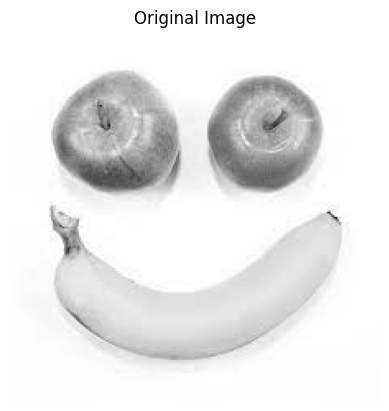

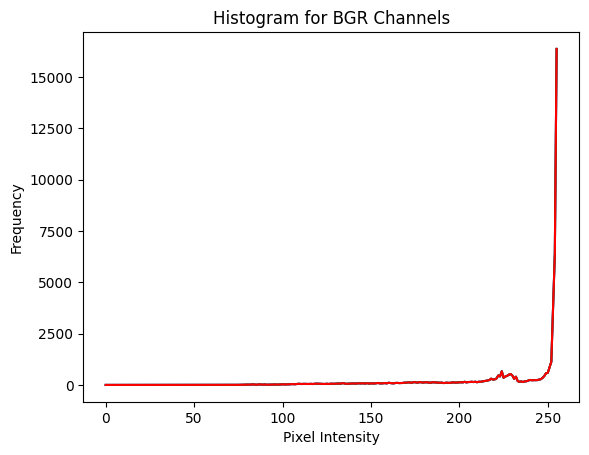

Min intensity per channel (BGR): [5 5 5]
Max intensity per channel (BGR): [255 255 255]
Intensity range per channel (BGR): [251 251 251]


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image
img1 = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_01 (1).png')

# Get image dimensions
rows, cols, channels = img1.shape
print(f"Image Dimensions: {rows} x {cols} x {channels}")

# Display the original image
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

# Calculate and plot histogram for each channel (B, G, R)
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img1], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.title('Histogram for BGR Channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Intensity calculations per channel
min_intensity = img1.min(axis=(0, 1))
max_intensity = img1.max(axis=(0, 1))
intensity_range = max_intensity - min_intensity + 1

print("Min intensity per channel (BGR):", min_intensity)
print("Max intensity per channel (BGR):", max_intensity)
print("Intensity range per channel (BGR):", intensity_range)


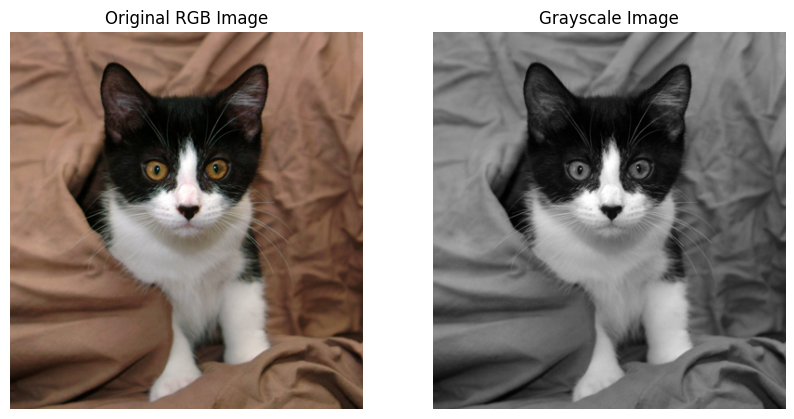

5x5 Sub-Region (Intensity Values):
[[106 107 108 109 107]
 [114 115 113 114 112]
 [118 119 118 118 116]
 [120 120 121 120 118]
 [122 122 120 120 119]]


In [4]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_02 (1).jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()
y, x = 50, 50
sub_region = gray[y:y+5, x:x+5]
print("5x5 Sub-Region (Intensity Values):")
print(sub_region)


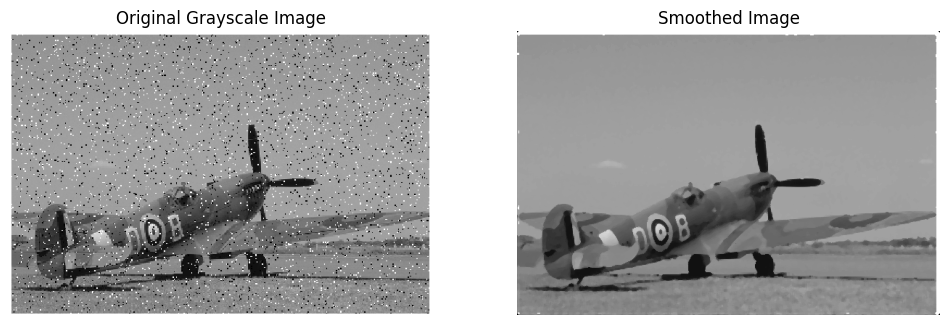

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def conv(image, kernel):
    kernelh, kernelw = kernel.shape
    padh = kernelh // 2
    padw = kernelw // 2
    padded_image = np.pad(image, ((padh, padh), (padw, padw)), 'constant')
    rows, cols = image.shape
    output = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            roi = padded_image[i:i+kernelh, j:j+kernelw]
            output[i, j] = np.median(roi)
    return output
img3 = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_03.png')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
smoothing_kernel = np.ones((5, 5), dtype=np.uint8) / 9
smooth_img = conv(img3_gray, smoothing_kernel)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img3_gray, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')
plt.subplot(1, 2, 2)
plt.imshow(smooth_img, cmap='gray')
plt.axis('off')
plt.title('Smoothed Image')
plt.show()